In [ ]:
%%script false
%cd /content/drive/MyDrive/Google Colab/NLP/Technometrics
%ls

/content/drive/MyDrive/Google Colab/NLP/Technometrics
Bi-LSTM_Train.ipynb         file_hist.json
Bi-LSTM_Ult.ipynb           Predict_Text.ipynb
Classification_Algo.ipynb   Pretrained_Models/
Classifier_Perdormance.csv  Process_Data/
Dataset/                    Saved_Model/
External.ipynb              Technometrics_Preprocessing.ipynb
file_hist_2.json


In [ ]:
import pandas as pd
import numpy as np
from statistics import mean, mode, median
import re

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from gensim.models import FastText
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from keras import Model 
from keras.layers.recurrent import LSTM

%matplotlib inline

In [ ]:
train_category = np.load('Process_Data/train_category.npy')
train_cleanText = np.load('Process_Data/train_cleanText.npy')

test_category = np.load('Process_Data/test_category.npy')
test_cleanText = np.load('Process_Data/test_cleanText.npy')

In [ ]:
print('=============================================')
print('                Train Data')
print('=============================================')
print('Shape of Train Text     : ',np.shape(train_cleanText))
print('Shape of Train Category : ',np.shape(train_category))
print('=============================================')
print('\n                Test Data')
print('=============================================')
print('Shape of Test Text      : ',np.shape(test_cleanText))
print('Shape of Test Category  : ',np.shape(test_category))

                Train Data
Shape of Train Text     :  (90118, 350, 20)
Shape of Train Category :  (90118, 7)

                Test Data
Shape of Test Text      :  (90233, 350, 20)
Shape of Test Category  :  (90233, 7)


In [ ]:
test_cleanText[0]

array([[ 8.143771  ,  3.200562  , -2.6945043 , ...,  8.069185  ,
        -0.7621708 , -6.6651444 ],
       [-1.5999174 ,  7.5781484 , -0.4735332 , ...,  8.359903  ,
        -0.67922145,  1.5229594 ],
       [ 2.461376  ,  1.7275422 , -0.2979339 , ...,  1.2472659 ,
        -1.4450709 , -2.1182125 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(15)))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
print('Train...')
history = model.fit(train_cleanText, train_category,
          batch_size=10,
          epochs=4,
          validation_data=(test_cleanText, test_category))

Train...
Epoch 1/4
9012/9012 [==============================] - 3927s 435ms/step - loss: 0.9166 - accuracy: 0.7006 - val_loss: 0.5384 - val_accuracy: 0.8316
Epoch 2/4
9012/9012 [==============================] - 3952s 438ms/step - loss: 0.6798 - accuracy: 0.7962 - val_loss: 0.5112 - val_accuracy: 0.8416
Epoch 3/4
9012/9012 [==============================] - 3946s 438ms/step - loss: 0.6387 - accuracy: 0.8119 - val_loss: 0.4617 - val_accuracy: 0.8560
Epoch 4/4
9012/9012 [==============================] - 3936s 437ms/step - loss: 0.6140 - accuracy: 0.8196 - val_loss: 0.4786 - val_accuracy: 0.8511


In [ ]:
model.save('Saved_Model/Biderectional.h5')
np.save('Saved_Model/Biderectional_hist_h5_2.npy', history.history)

# Performance of Model

In [ ]:
history = np.load('Saved_Model/Biderectional_hist_h5_2.npy',allow_pickle=True).tolist()

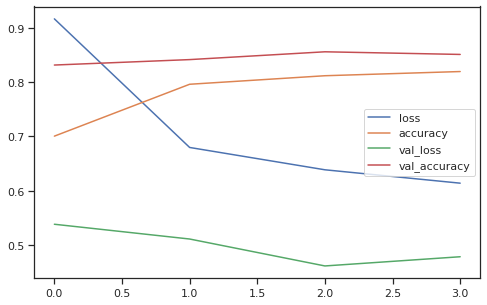

In [ ]:
pd.DataFrame(history).plot(figsize=(8,5))
plt.show()

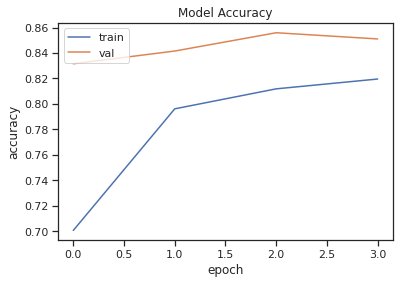

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

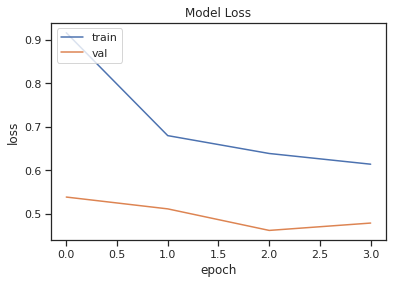

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()